In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from logitplots import plt_confusion_matrix, plt_decision_boundaries, plt_correlation_matrix
df = pd.read_csv("virtualInternshipData_ADS2001.csv")
x = df[["m_experimental_testing","m_making_design_choices","m_asking_questions","j_customer_consultants_requests","j_performance_parameters_requirements","j_communication","wordCount"]]
y = df[["OutcomeScore"]]

In [49]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

from imblearn.over_sampling import SMOTE, ADASYN
#x_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)
#x_resampled, y_resampled = ADASYN().fit_resample(x_train, y_train)

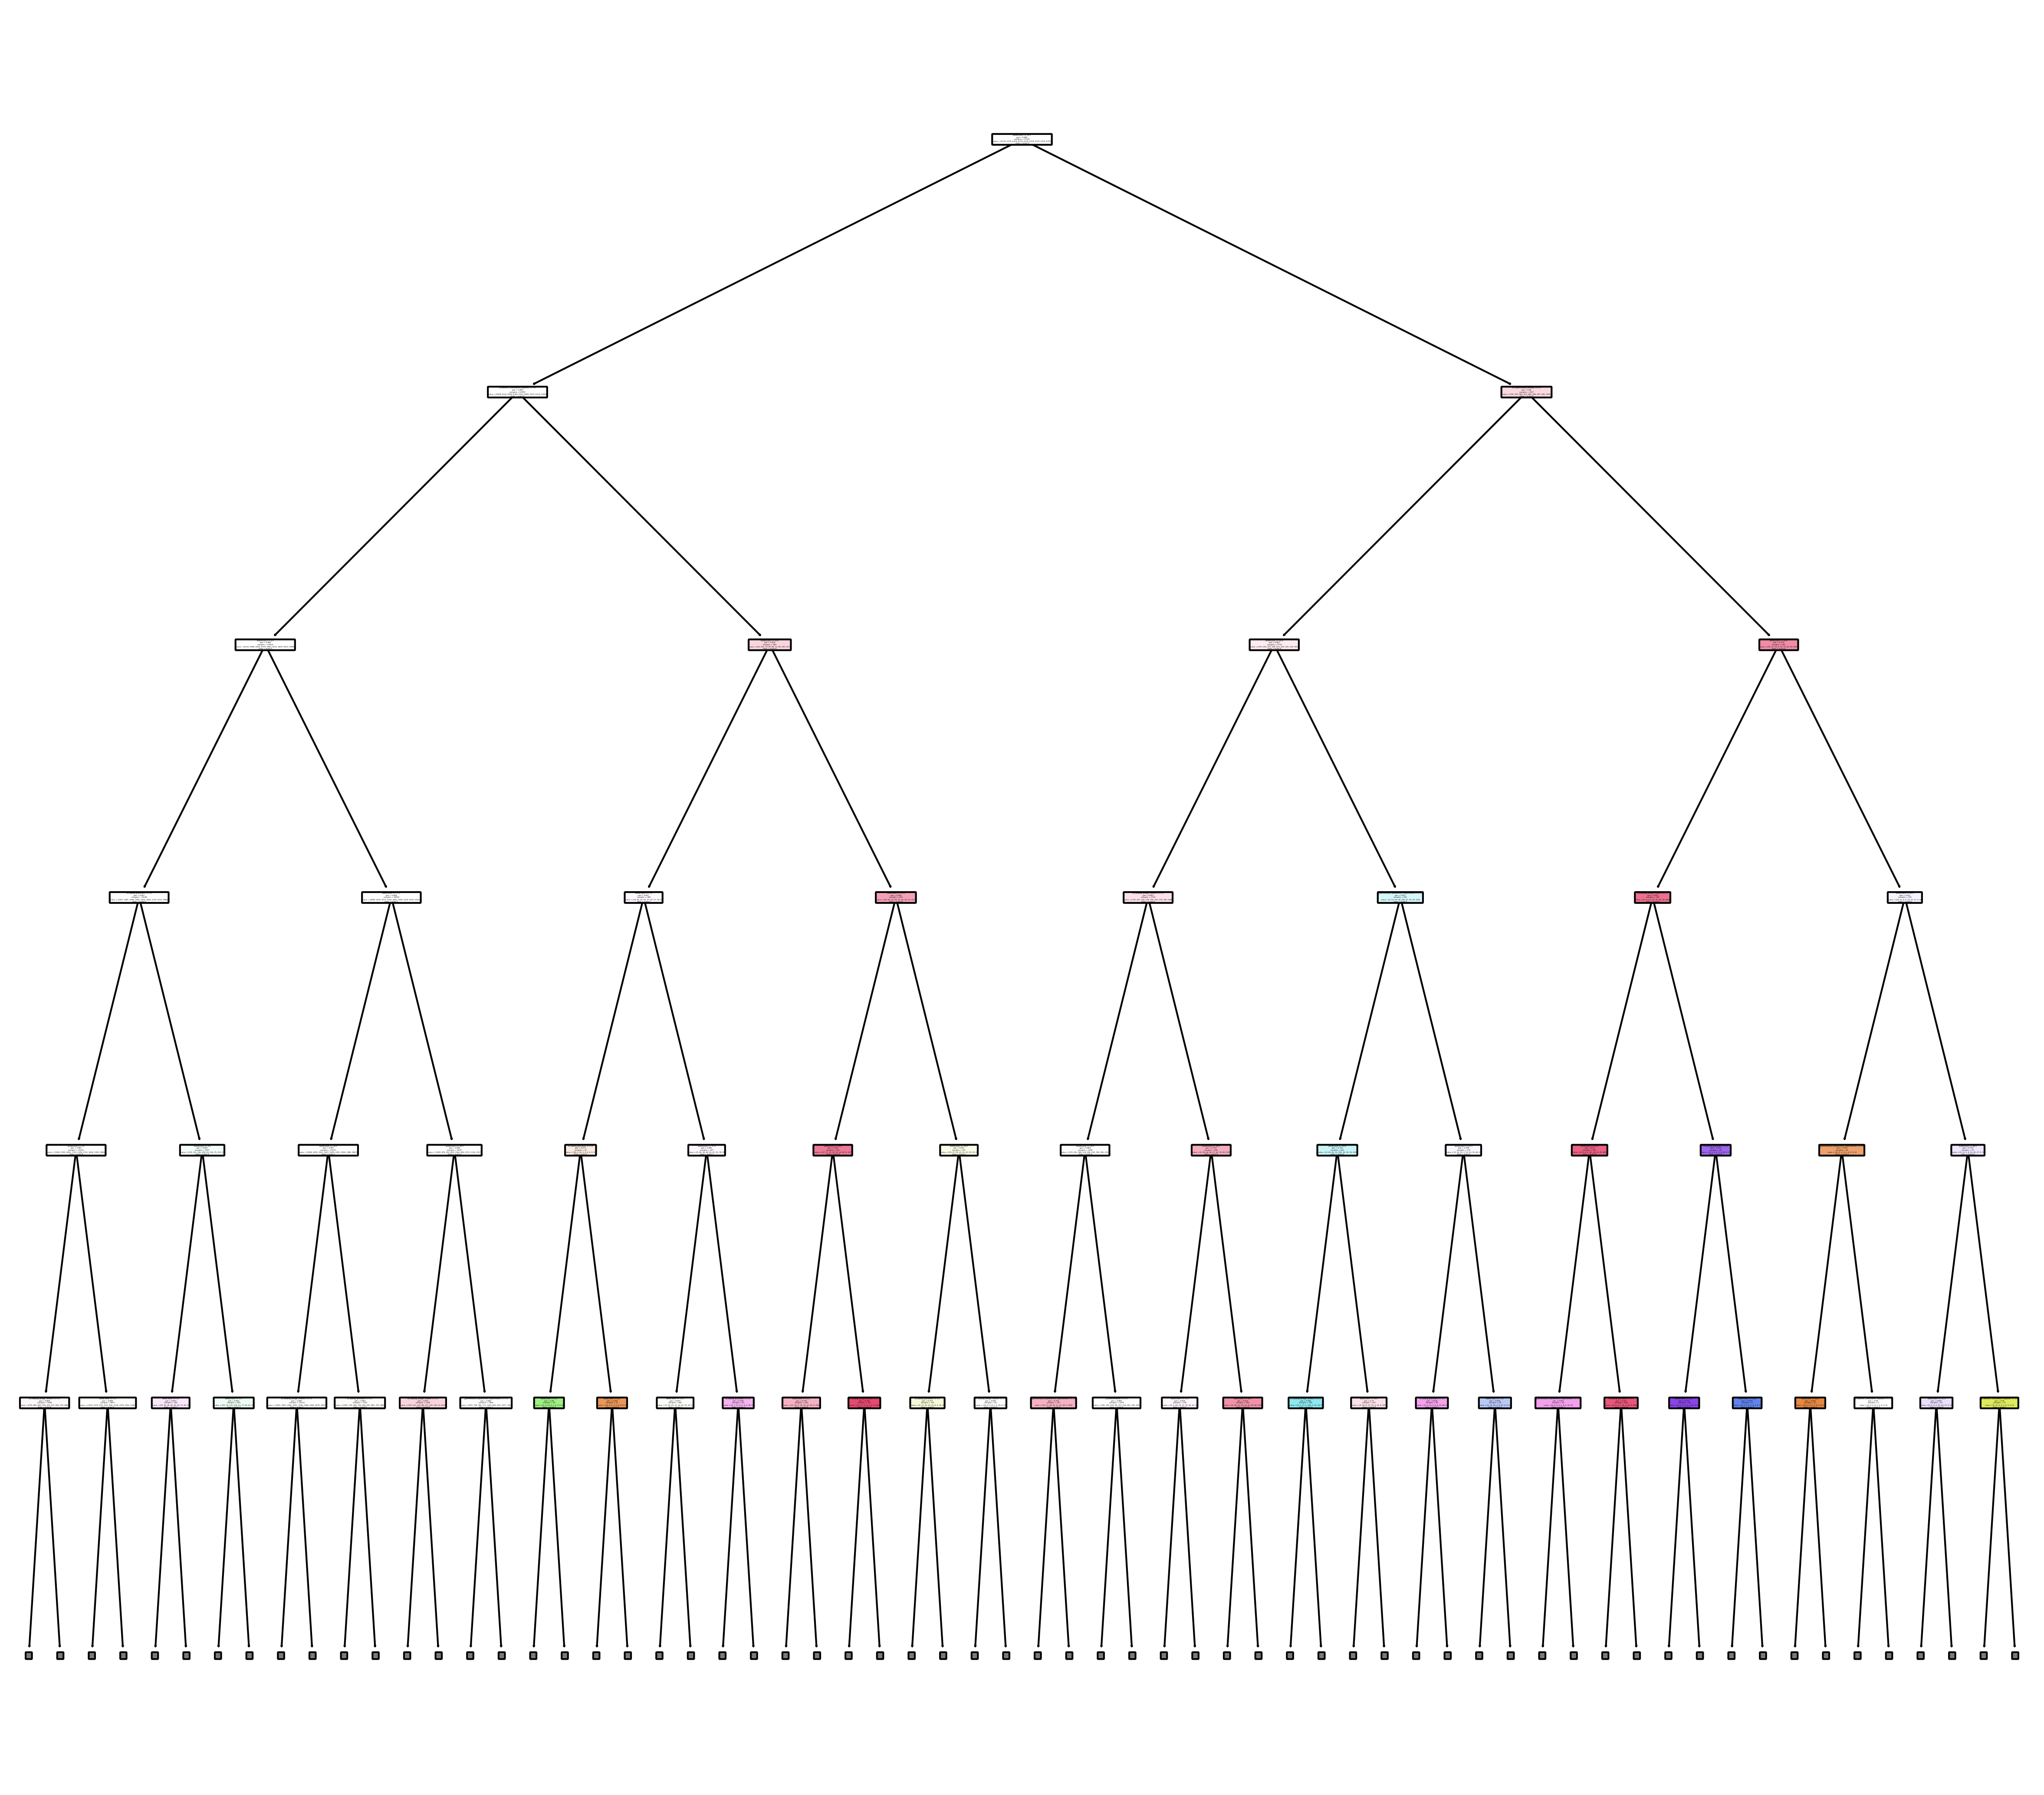

In [50]:
df_dtc = DecisionTreeClassifier(random_state = 42) 
df_dtc = df_dtc.fit(x_resampled, y_resampled) 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,18), dpi=300) # initialise the plots and axes
# plot the decision tree for the model df_dtc
plot_tree(df_dtc,
 filled = True, # colour the nodes according to the classifaction
 rounded = True, # make the nodes have rounded corners
 class_names = ["score 0", "score 1","score 2","score 3","score 4","score 5","score 6","score 7","score 8"],
 feature_names = x.columns, # use these names for features
 max_depth=5
 );

Decision Tree Accuracy: 0.12721584984358708


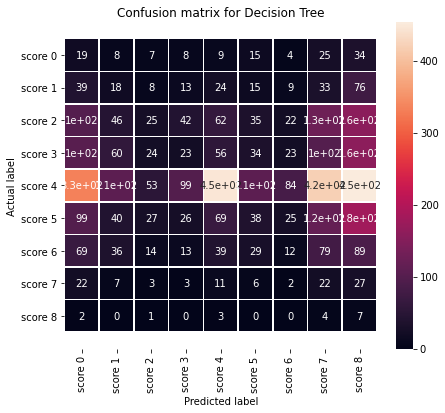

In [51]:
Y_pred = df_dtc.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
plt_confusion_matrix(cm, ["score 0", "score 1","score 2","score 3","score 4","score 5","score 6","score 7","score 8"], 'Decision Tree') 
print("Decision Tree Accuracy:",accuracy_score(y_test, Y_pred))

In [52]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_resampled,y_resampled)
rf.estimators_

<ipython-input-52-887da8b29c88>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_resampled,y_resampled)


[DecisionTreeClassifier(max_features='auto', random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_features='auto', random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_features='auto', random_state=1914837113),
 DecisionTreeClassifier(max_features='auto', random_state=669991378),
 DecisionTreeClassifier(max_features='auto', random_state=429389014),
 DecisionTreeClassifier(max_features='auto', random_state=249467210),
 DecisionTreeClassifier(max_features='auto', random_state=1972458954),
 DecisionTreeC

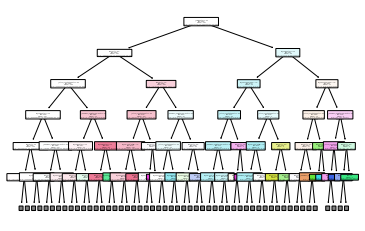

In [53]:
plot_tree(rf[1],
 filled = True, # colour the nodes according to the classifaction
 rounded = True, # make the nodes have rounded corners
 class_names = ["score 0", "score 1","score 2","score 3","score 4","score 5","score 6","score 7","score 8"],
 feature_names = x.columns, # use these names for features
 max_depth=5
 );

Decision Tree Accuracy: 0.12700729927007298


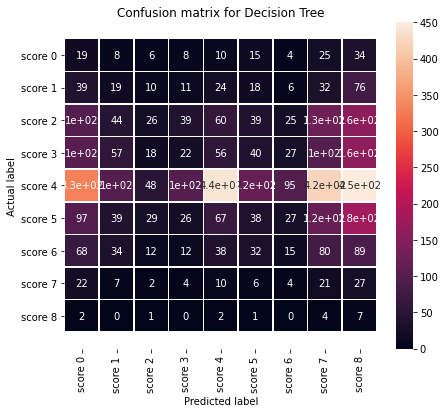

In [55]:
Y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, Y_pred)
plt_confusion_matrix(cm, ["score 0", "score 1","score 2","score 3","score 4","score 5","score 6","score 7","score 8"], 'Decision Tree') 
print("Decision Tree Accuracy:",accuracy_score(y_test, Y_pred))